In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.data import *
from utils.MobileNet import *
from utils.models import *
from keras.regularizers import l1,l2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

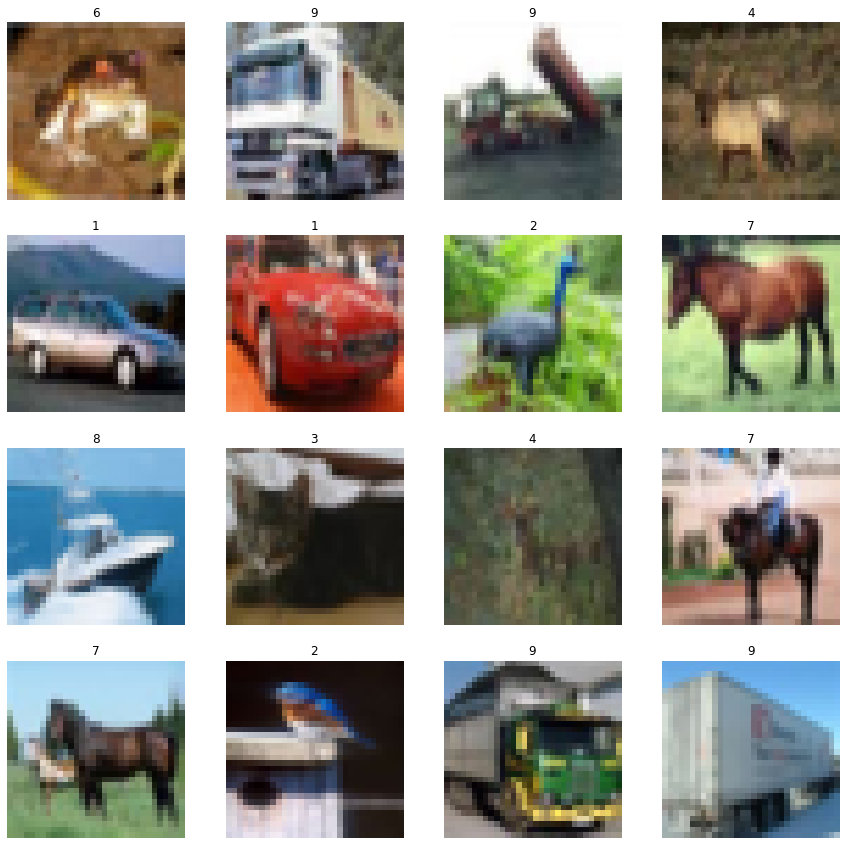

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x_train[i,:,:,:])
    ax.axis('off')
    ax.title.set_text(np.argmax(y_train[i]))

In [21]:
model = MobileNetV2(input_shape = x_train.shape[1:], 
              n_classes = 10, 
              alpha = 0.25, 
              reg_c= l2(l=0.001),
              reg_dc = None,
              add_batch_norm = True, 
              add_dropout = False, 
              dropout_rate = 0.5, 
              optimizer = RMSprop(lr=0.001, rho=0.9))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)       

In [23]:
datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.1)

In [24]:
train_generator = datagen.flow(x_train,y_train,batch_size=128, subset='training')
validation_generator = datagen.flow(x_train,y_train, subset='validation')

In [25]:
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator, 
                              epochs=30, 
                              verbose = 1, 
                              steps_per_epoch=100)

Epoch 1/30
  5/100 [>.............................] - ETA: 24:25 - loss: 4.0498 - accuracy: 0.1531

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])